In [152]:
from dictionary_graph import DictionaryGraph
import pandas as pd
import numpy as np
from scipy.sparse.linalg import eigsh
import networkx as nx
import matplotlib.pyplot as plt

In [48]:
def similarity_projector(A, B):
    B = B.toarray()
    M = np.kron(A, B) + np.kron(A.T, B.T)
    Z = np.full((A.shape[0] * B.shape[0], 1), 1)
    eigenvalues, V = eigsh(M, k=2)
    assert np.isclose(np.dot(V[:,0], V[:,1]), 0)
    P = V@V.T
    assert(np.allclose(P, P@P))
    L = P@Z
    L = L / np.linalg.norm(L, 'fro')
    return L.reshape(A.shape[0], B.shape[0]).T

In [155]:
graph = DictionaryGraph('OPTED', 'a-z')
def get_synonyms_projector(word, n=10, **kwargs):
    N = n
    vertices, adjacency_matrix = graph.adjacency_matrix(word, **kwargs)
    S = pd.DataFrame(similarity_projector(
        np.array([
            [0, 1, 0],
            [0, 0, 1],
            [0, 0, 0],
        ], dtype=np.float64),
        adjacency_matrix,
    ), index=vertices)
    draw_graph(adjacency_matrix, n, vertices, S[1].nlargest(n).index.tolist())
    return S[1].nlargest(n)

def draw_graph(adjacency_matrix, n, vertices, top_words):
    labels = {}
    top_indices = []
    j = 0
    for i in range (len(vertices)-1, -1, -1):
        word = vertices[i]
        if word in top_words:
            labels[j] = vertices[i]            
            top_indices.append(i)
            j += 1
    
    A = adjacency_matrix.toarray()

    for i in range (A.shape[0]-1, -1, -1):
        if i not in top_indices:
            A = np.delete(A, i, 0)
    for i in range (A.shape[1]-1, -1, -1):
        if i not in top_indices:
            A = np.delete(A, i, 1)
            
    g=nx.from_numpy_matrix(A,create_using=nx.MultiDiGraph())
    nx.draw(g,pos=nx.circular_layout(g),labels=labels,node_size=4000)

value
to           0.191060
as           0.188393
a            0.180137
or           0.178049
of           0.173065
the          0.160774
disappear    0.142423
be           0.131523
from         0.126350
at           0.109615
Name: 1, dtype: float64


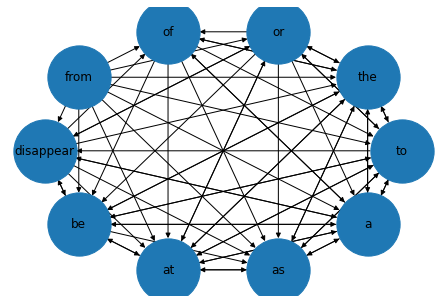

In [157]:
print(get_synonyms_projector('disappear', method=0, f=None))

value
disappear    0.372864
vanish       0.196902
pass         0.150385
die          0.123481
fade         0.111587
faint        0.105166
wear         0.091632
gradually    0.087204
light        0.066426
evanid       0.061807
Name: 1, dtype: float64


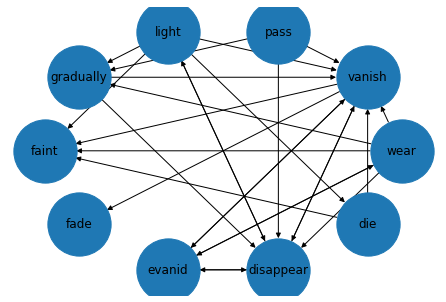

In [159]:
print(get_synonyms_projector('disappear', method=1, f=None))

value
evanid         0.579632
vanish         0.016232
disappear      0.015307
faint          0.007629
fade           0.001704
die            0.001570
pass           0.001428
dissipate      0.001419
evanesce       0.001418
disappeared    0.000820
Name: 1, dtype: float64


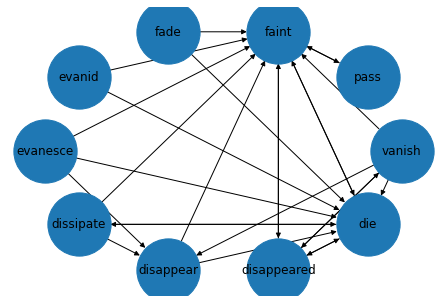

In [160]:
print(get_synonyms_projector('disappear', method=2, f=None))

value
evanid       0.412433
disappear    0.267852
vanish       0.181600
faint        0.107371
fade         0.102122
die          0.074100
pass         0.064194
eliminate    0.057670
dissipate    0.054380
evanesce     0.051679
Name: 1, dtype: float64


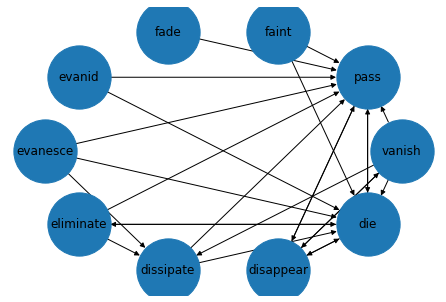

In [161]:
print(get_synonyms_projector('disappear', method=2, f=np.sqrt))

value
disappear    0.301619
evanid       0.187195
vanish       0.181794
to           0.120929
as           0.110797
fade         0.108218
faint        0.105807
pass         0.105748
die          0.103572
or           0.095774
Name: 1, dtype: float64


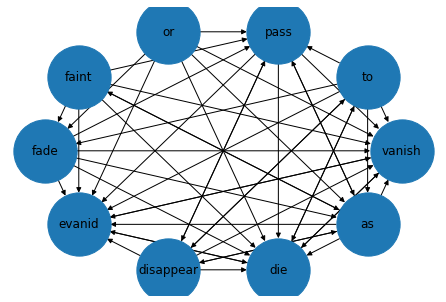

In [163]:
print(get_synonyms_projector('disappear', method=2, f=lambda x: np.log(1+x)))